In [1]:
import sklearn
import numpy as np
import pickle as pkl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from funcs.utils import *
from funcs.explain import *
import shap
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from funcs.DIMV import DIMVImputation
from funcs.miss_forest import mf

missing_rate = 0.2
nruns = 10
ouput_name = 'XGBRegressor_diabetes_rate02'  

from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target 

def get_split():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), columns = diabetes.feature_names)
    X_test = pd.DataFrame(scaler.transform(X_test), columns = diabetes.feature_names)
    
    y_train, y_test = y_train.reshape((-1,1)), y_test.reshape((-1,1))
    scaler_y = StandardScaler()
    scaler_y.fit(y_train)
    y_train = pd.DataFrame(scaler_y.transform(y_train))
    y_test = pd.DataFrame(scaler_y.transform(y_test))
    X_train_star = generate_missing_data(X_train, rate=missing_rate)
    X_test_star = generate_missing_data(X_test, rate=missing_rate) 
    return X_train, X_train_star, y_train, X_test, X_test_star, y_test
chosen_model = xgboost.XGBRegressor(n_estimators=100, max_depth=2)


Instructions for updating:
non-resource variables are not supported in the long term


# Generate missing data, impute, and use SHAP to explain

In [2]:
results = []
for i in range(nruns):
    X_train, X_train_star, y_train, X_test, X_test_star, y_test = get_split()
    print('iteration:',i)
    results.append(one_run(X_train, X_train_star, y_train, X_test, X_test_star, y_test, chosen_model))

iteration: 0


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 36.91it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 47.17it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 47.91it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 47.92it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 47.45it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 47.22it/s]


Validation result: best alpha 0.1, best score 0.6866035768464905, scores {0.0: 0.7340512193532781, 0.01: 0.6885946407931121, 0.1: 0.6866035768464905, 1.0: 0.768958342675425, 10.0: 0.9265062844192853, 100.0: 0.9905141866683382}
Value alpha used in for transforming is: 0.1


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 208.29it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 47.97it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 47.27it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 47.91it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 47.69it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 47.67it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 47.91it/s]


Validation result: best alpha 0.1, best score 0.6866035768464905, scores {0.0: 0.7340512193532781, 0.01: 0.6885946407931121, 0.1: 0.6866035768464905, 1.0: 0.7689583426754248, 10.0: 0.9265062844192853, 100.0: 0.9905141866683382}
Value alpha used in for transforming is: 0.1


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 555.42it/s]


loss 0.09609785450593708
loss 0.015245385130262445
loss 0.007946586972483368
number of runs used by missForest: 3
loss: 0.007946586972483368
loss 0.09648566610835109
loss 0.018196610409414216
loss 0.008786485166593498
number of runs used by missForest: 3
loss: 0.008786485166593498



100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 692.34it/s]


iteration: 1


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 40.51it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.11it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.09it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.11it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.55it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.44it/s]


Validation result: best alpha 0.01, best score 0.6812912657344843, scores {0.0: 0.6855535306192305, 0.01: 0.6812912657344843, 0.1: 0.6904622012319298, 1.0: 0.7662078854783363, 10.0: 0.9182666378648824, 100.0: 0.9832461293578041}
Value alpha used in for transforming is: 0.01


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 192.27it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.66it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.03it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.48it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.22it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.62it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.24it/s]


Validation result: best alpha 0.01, best score 0.6812912657344842, scores {0.0: 0.6855535306192305, 0.01: 0.6812912657344842, 0.1: 0.6904622012319298, 1.0: 0.7662078854783363, 10.0: 0.9182666378648824, 100.0: 0.9832461293578041}
Value alpha used in for transforming is: 0.01


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 526.20it/s]


loss 0.10437153330420332
loss 0.019249904775335683
loss 0.012654073916410467
loss 0.01182476388063614
loss 0.011532497875806855
loss 0.010918809038440806
loss 0.011353548124076908
loss 0.01168702528756505
loss 0.01166385811240476
loss 0.011190912007121872
number of runs used by missForest: 10
loss: 0.011190912007121872
loss 0.1041992584450135
loss 0.019145572388529913
loss 0.012245890611226102
loss 0.012026927554578948
loss 0.0123661469453044
loss 0.012968593212236573
loss 0.012942102443040027
loss 0.012923233432302242
loss 0.012059087903719486
loss 0.01267732042066433
number of runs used by missForest: 10
loss: 0.01267732042066433


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 719.84it/s]


iteration: 2


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 40.12it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.26it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.46it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.69it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.51it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.62it/s]


Validation result: best alpha 0.1, best score 0.68673529577197, scores {0.0: 0.7064276921237251, 0.01: 0.690174099148596, 0.1: 0.68673529577197, 1.0: 0.7698234916148675, 10.0: 0.9268765315128731, 100.0: 0.9904582539620399}
Value alpha used in for transforming is: 0.1


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 199.69it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.26it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.50it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 43.78it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.23it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.22it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.63it/s]


Validation result: best alpha 0.1, best score 0.68673529577197, scores {0.0: 0.7064276921237251, 0.01: 0.690174099148596, 0.1: 0.68673529577197, 1.0: 0.7698234916148674, 10.0: 0.9268765315128732, 100.0: 0.99045825396204}
Value alpha used in for transforming is: 0.1


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 555.49it/s]


loss 0.10343222339353624
loss 0.02002270457554461
loss 0.01092170507651904
loss 0.009247992519276653
number of runs used by missForest: 4
loss: 0.009247992519276653
loss 0.10378302924901081
loss 0.01897969318657694
loss 0.010741982640290868
loss 0.009885715548615712
number of runs used by missForest: 4
loss: 0.009885715548615712


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 704.34it/s]


iteration: 3


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 39.04it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 43.07it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 43.14it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 43.12it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 43.12it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 43.29it/s]


Validation result: best alpha 0.1, best score 0.6874730991395916, scores {0.0: 0.7344904344147609, 0.01: 823.021010076873, 0.1: 0.6874730991395916, 1.0: 0.7687470465733336, 10.0: 0.9255212900252985, 100.0: 0.9904596764546644}
Value alpha used in for transforming is: 0.1


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 188.39it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 43.31it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 43.11it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 43.33it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.69it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.37it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 43.31it/s]


Validation result: best alpha 0.1, best score 0.6874730991395916, scores {0.0: 0.7344904344147609, 0.01: 823.0210100768732, 0.1: 0.6874730991395916, 1.0: 0.7687470465733336, 10.0: 0.9255212900252985, 100.0: 0.9904596764546644}
Value alpha used in for transforming is: 0.1


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 588.14it/s]


loss 0.09768856967724467
loss 0.013510822020744611
loss 0.008985864397883327
number of runs used by missForest: 3
loss: 0.008985864397883327
loss 0.09916900561913772
loss 0.01590772100888797
loss 0.008342789716142019
number of runs used by missForest: 3
loss: 0.008342789716142019


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 692.20it/s]


iteration: 4


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 40.47it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.44it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.63it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.64it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.86it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.47it/s]


Validation result: best alpha 0.01, best score 0.7075928819983768, scores {0.0: 2.705343399824922, 0.01: 0.7075928819983768, 0.1: 0.7123916190844869, 1.0: 0.7878657567722335, 10.0: 0.9332341822177961, 100.0: 0.9957764377381314}
Value alpha used in for transforming is: 0.01


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 204.04it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.66it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.44it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.71it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.49it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.44it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.66it/s]


Validation result: best alpha 0.01, best score 0.7075928819983768, scores {0.0: 2.705343399824922, 0.01: 0.7075928819983768, 0.1: 0.7123916190844868, 1.0: 0.7878657567722335, 10.0: 0.9332341822177961, 100.0: 0.9957764377381315}
Value alpha used in for transforming is: 0.01


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 454.47it/s]


loss 0.10585567676262315
loss 0.016740267991895968
loss 0.010765985777243537
loss 0.009097421025919511
number of runs used by missForest: 4
loss: 0.009097421025919511
loss 0.11129437743969059
loss 0.021080833451066115
loss 0.012863803357918445
loss 0.012238526053319298
loss 0.013098207866136056
loss 0.012742982254078149
loss 0.013101175582358723
loss 0.013470094638047901
loss 0.013522677603517894
loss 0.014084442278079227
number of runs used by missForest: 10
loss: 0.014084442278079227


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 676.98it/s]


iteration: 5


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 38.58it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.79it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.71it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.74it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.91it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.79it/s]


Validation result: best alpha 0.1, best score 0.6971296362799128, scores {0.0: 0.8693002259337086, 0.01: 1.4186309795141465, 0.1: 0.6971296362799128, 1.0: 0.7694000702521888, 10.0: 0.926186379180579, 100.0: 0.9915429710831068}
Value alpha used in for transforming is: 0.1


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 188.41it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.69it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.16it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.91it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.77it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.90it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.69it/s]


Validation result: best alpha 0.1, best score 0.6971296362799128, scores {0.0: 0.8693002259337086, 0.01: 1.4186309795141465, 0.1: 0.6971296362799128, 1.0: 0.7694000702521888, 10.0: 0.926186379180579, 100.0: 0.9915429710831068}
Value alpha used in for transforming is: 0.1


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 499.90it/s]


loss 0.11214719233196008
loss 0.02039134712075063
loss 0.013588090537517935
loss 0.012446088430855241
loss 0.011473490516008052
loss 0.010241474221315926
loss 0.010612372853470917
loss 0.011433927455920104
loss 0.011094059997400676
loss 0.011683556251281943
number of runs used by missForest: 10
loss: 0.011683556251281943
loss 0.11194386855369019
loss 0.02305312871051611
loss 0.012923413264135071
loss 0.012003322086656491
loss 0.013036262138712923
loss 0.014384849418753475
loss 0.014977783911445828
loss 0.01607783891274156
loss 0.01706319345526663
loss 0.018402616153802072
number of runs used by missForest: 10
loss: 0.018402616153802072


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 657.76it/s]


iteration: 6


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 38.26it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.74it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.73it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.74it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.78it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.73it/s]


Validation result: best alpha 0.1, best score 0.7074561602610101, scores {0.0: 2.0892216463860733, 0.01: 3.760463112337913, 0.1: 0.7074561602610101, 1.0: 0.7811084586949383, 10.0: 0.9340030701886495, 100.0: 0.9994290119907486}
Value alpha used in for transforming is: 0.1


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 184.90it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.51it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.51it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.78it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.73it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.75it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.66it/s]


Validation result: best alpha 0.1, best score 0.70745616026101, scores {0.0: 2.0892216463860733, 0.01: 3.760463112337913, 0.1: 0.70745616026101, 1.0: 0.7811084586949383, 10.0: 0.9340030701886495, 100.0: 0.9994290119907486}
Value alpha used in for transforming is: 0.1


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 499.92it/s]


loss 0.10279534405582957
loss 0.01549430006990234
loss 0.009934676715012703
number of runs used by missForest: 3
loss: 0.009934676715012703
loss 0.10748205956512277
loss 0.01781826745868112
loss 0.011648709251478774
loss 0.010847240783934663
loss 0.011444210554908192
loss 0.011668503865866264
loss 0.012534671591409141
loss 0.012763747007659863
loss 0.012963945431863267
loss 0.012812635299491504
number of runs used by missForest: 10
loss: 0.012812635299491504


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 653.46it/s]


iteration: 7


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 43.91it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 48.31it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 49.26it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 49.09it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 49.25it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 49.34it/s]


Validation result: best alpha 0.01, best score 0.6639194625726728, scores {0.0: 0.6651771926135122, 0.01: 0.6639194625726728, 0.1: 0.6773321329261174, 1.0: 0.7578701659587876, 10.0: 0.9146866504891455, 100.0: 0.9825219910984998}
Value alpha used in for transforming is: 0.01


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 217.35it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 49.28it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 49.03it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 49.12it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 49.12it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 48.87it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 49.52it/s]


Validation result: best alpha 0.01, best score 0.6639194625726728, scores {0.0: 0.6651771926135122, 0.01: 0.6639194625726728, 0.1: 0.6773321329261174, 1.0: 0.7578701659587878, 10.0: 0.9146866504891455, 100.0: 0.9825219910984998}
Value alpha used in for transforming is: 0.01


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 666.57it/s]


loss 0.10556386909820883
loss 0.013760078418425008
loss 0.00808581607877204
number of runs used by missForest: 3
loss: 0.00808581607877204
loss 0.10142740260151818
loss 0.017372697138147285
loss 0.009975408484659241
number of runs used by missForest: 3
loss: 0.009975408484659241


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 644.85it/s]


iteration: 8


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 40.10it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.02it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.26it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.33it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.42it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.31it/s]


Validation result: best alpha 0.1, best score 0.6754198272875382, scores {0.0: 3.5776023769449834, 0.01: 3.208274643377699, 0.1: 0.6754198272875382, 1.0: 0.7624774564959315, 10.0: 0.924063755345951, 100.0: 0.9900788364792362}
Value alpha used in for transforming is: 0.1


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 191.91it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.37it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 43.92it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 43.75it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.38it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.20it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.09it/s]


Validation result: best alpha 0.1, best score 0.6754198272875382, scores {0.0: 3.577602376944983, 0.01: 3.208274643377699, 0.1: 0.6754198272875382, 1.0: 0.7624774564959315, 10.0: 0.924063755345951, 100.0: 0.9900788364792362}
Value alpha used in for transforming is: 0.1


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 551.57it/s]


loss 0.1090328799344187
loss 0.01971343690470009
loss 0.011455870984498944
loss 0.010164279985079381
loss 0.009644318425974359
number of runs used by missForest: 5
loss: 0.009644318425974359
loss 0.10356753513205152
loss 0.020508568539118387
loss 0.012925488369066136
loss 0.010664407662930076
loss 0.010204433821994843
loss 0.010841843614801233
loss 0.011622266276154411
loss 0.012043003028618831
loss 0.012397777486399864
loss 0.01262788533710001
number of runs used by missForest: 10
loss: 0.01262788533710001


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 645.76it/s]


iteration: 9


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 38.73it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.71it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.67it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.70it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.51it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 43.00it/s]


Validation result: best alpha 0.01, best score 0.6749285778880525, scores {0.0: 0.6780323081808755, 0.01: 0.6749285778880525, 0.1: 0.689394589768996, 1.0: 0.7693903531077347, 10.0: 0.9235839196025784, 100.0: 0.9881830267862416}
Value alpha used in for transforming is: 0.01


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 188.33it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 43.05it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.12it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.75it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.49it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 43.09it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.91it/s]


Validation result: best alpha 0.01, best score 0.6749285778880525, scores {0.0: 0.6780323081808755, 0.01: 0.6749285778880525, 0.1: 0.689394589768996, 1.0: 0.7693903531077347, 10.0: 0.9235839196025784, 100.0: 0.9881830267862416}
Value alpha used in for transforming is: 0.01


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 555.43it/s]


loss 0.10626075180071774
loss 0.018939693715086157
loss 0.009666747517964916
number of runs used by missForest: 3
loss: 0.009666747517964916
loss 0.10702883529350729
loss 0.018307957339435438
loss 0.010299033364198821
loss 0.009092615831174941
number of runs used by missForest: 4
loss: 0.009092615831174941


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 626.03it/s]


So, the first layer of results is the result of each run. Then, for the sub-level:
- level 0: shape_values_ori, shap_values_xm...
- level 1:  other_measures = [mse_imputation_all, mse_shap_all, mse_ypred_all, cor_ypred_all, spearman_ypred]

In [3]:
def get_average_shap_vals(results, j, nruns):
    # get the average shap values from all runs for each imputation method or the original 
    current = results[0][0][j]
    for i in range(1, nruns):
        current.values += results[i][0][j].values
        current.base_values += results[i][0][j].base_values
        current.data += results[i][0][j].data  
    current.values = current.values/nruns
    current.base_values = current.base_values/nruns
    current.data = current.data/nruns
    return current

In [4]:
shap_values_ori = get_average_shap_vals(results, j = 0, nruns= nruns)
shap_values_xm = get_average_shap_vals(results, j = 1, nruns= nruns)
shap_values_mi = get_average_shap_vals(results, j = 2, nruns = nruns)
shap_values_mice = get_average_shap_vals(results, j = 3, nruns= nruns)
shap_values_dimv = get_average_shap_vals(results, j = 4, nruns= nruns)
shap_values_mf = get_average_shap_vals(results, j = 5, nruns= nruns)
shap_values_soft = get_average_shap_vals(results, j = 6, nruns= nruns)
shap_values_gain = get_average_shap_vals(results, j = 7, nruns= nruns)

In [5]:
ranking_res = shap_ranking_table(X_train, shap_values_ori,shap_values_xm, shap_values_mi, shap_values_mice,
                   shap_values_dimv, shap_values_mf, shap_values_soft, shap_values_gain)

combined_feature_importance
\begin{tabular}{lrrrrrrrr}
\toprule
 & Original & Xgb on missing data & Mean Imputation & MICE & DIMV & missForest & SOFT-IMPUTE & GAIN \\
Ranking &  &  &  &  &  &  &  &  \\
\midrule
bmi & 0.097 & 0.226 & 0.092 & 0.085 & 0.086 & 0.082 & 0.091 & 0.089 \\
s5 & 0.096 & 0.107 & 0.082 & 0.085 & 0.089 & 0.088 & 0.085 & 0.088 \\
bp & 0.041 & 0.187 & 0.040 & 0.036 & 0.035 & 0.032 & 0.035 & 0.041 \\
s3 & 0.040 & 0.041 & 0.042 & 0.042 & 0.047 & 0.042 & 0.045 & 0.043 \\
sex & 0.031 & 0.035 & 0.024 & 0.027 & 0.033 & 0.029 & 0.030 & 0.015 \\
s6 & 0.030 & 0.052 & 0.038 & 0.036 & 0.033 & 0.034 & 0.030 & 0.029 \\
s2 & 0.029 & 0.055 & 0.030 & 0.028 & 0.027 & 0.036 & 0.025 & 0.029 \\
age & 0.028 & 0.047 & 0.025 & 0.024 & 0.025 & 0.026 & 0.024 & 0.020 \\
s4 & 0.027 & 0.055 & 0.028 & 0.026 & 0.026 & 0.026 & 0.026 & 0.035 \\
s1 & 0.022 & 0.032 & 0.027 & 0.025 & 0.026 & 0.027 & 0.027 & 0.028 \\
\bottomrule
\end{tabular}



In [6]:
    j = 0
    mse_now = results[0][1][j]
    for i in range(1, nruns):
        mse_now += results[i][1][j]
    mse_imputation_all = mse_now/nruns  
    print("the MSE between the imputed X_test of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original X_test:")
    print(mse_imputation_all.round(3))

    j = 1
    mse_now = results[0][1][j]
    for i in range(1, nruns):
        mse_now += results[i][1][j]    
    mse_shap_all = mse_now/nruns 
    print("the MSE between the Shapley values of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:")
    print(mse_shap_all.round(3))

    j = 2
    mse_ypred_now = results[0][1][j]
    for i in range(1, nruns):
        mse_ypred_now += results[i][1][j]    
    mse_ypred_all = mse_ypred_now/nruns 
    print("the MSE between y predicted on test set of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:")
    print(mse_ypred_all.round(3))

    j = 3
    mse_ypred_now = results[0][1][j]
    for i in range(1, nruns):
        mse_ypred_now += results[i][1][j]    
    spearman_ypred = mse_ypred_now/nruns 
    print("the ranking correlation for spearman rank correlation between the predicted y on test set of original data and y predicted on imputed data")
    print(spearman_ypred.round(3))

    j = 4
    mse_ypred_now = results[0][1][j]
    for i in range(1, nruns):
        mse_ypred_now += results[i][1][j]    
    spearman_ypred = mse_ypred_now/nruns 
    print("the ranking correlation for spearman rank correlation between imputed features")
    print(spearman_ypred.round(3))

the MSE between the imputed X_test of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original X_test:
[0.217 0.113 0.107 0.121 0.115 0.251]
the MSE between the Shapley values of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:
[0.063 0.019 0.016 0.016 0.017 0.016 0.021]
the MSE between y predicted on test set of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:
[0.193 0.188 0.161 0.15  0.17  0.155 0.216]
the ranking correlation for spearman rank correlation between the predicted y on test set of original data and y predicted on imputed data
[[0.825 0.   ]
 [0.832 0.   ]
 [0.863 0.   ]
 [0.873 0.   ]
 [0.848 0.   ]
 [0.858 0.   ]
 [0.803 0.   ]]
the ranking correlation for spearman rank correlation between imputed features
[[0.615 0.692 0.615 0.563 0.67  0.652 0.657 0.544 0.79  0.657]
 [0.498 0.714 0.82  0.699 0.251 0.322 0.654 0.426 0.83  0.544]
 [0.505 0.796 0.81  0.65  0.434 0.462 0.77  0.327 0.89  0.509]
 [0.5   0.751 0.829 0.

In [7]:
dfplot = pd.DataFrame({'MSE':np.hstack((0,mse_imputation_all)), 'Spearman statistic': spearman_ypred[:,0]}, index = ['Xgb on missing data','Mean Imputation','MICE','DIMV','missForest','SOFT-IMPUTE', 'GAIN'])
dfplot

,MSE,Spearman statistic
Xgb on missing data,0.000000,0.615286
Mean Imputation,0.217274,0.498240
MICE,0.113086,0.504556
DIMV,0.107304,0.499925
missForest,0.120589,0.510476
SOFT-IMPUTE,0.115489,0.481507
GAIN,0.251178,0.436592


imputation MSE versus Spearman statistic


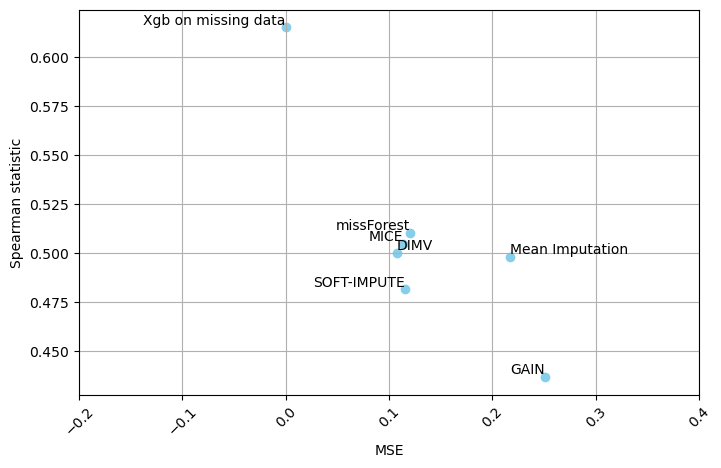

In [8]:
print('imputation MSE versus Spearman statistic')
plt.figure(figsize=(8, 5))
plt.scatter(dfplot['MSE'], dfplot['Spearman statistic'], color='skyblue')
for i, row in dfplot.iterrows():
    if (row.name == 'Mean Imputation') or (row.name == 'DIMV'):
        plt.text(row['MSE'],row['Spearman statistic'], row.name, ha='left', va='bottom')
    else:
        plt.text(row['MSE'],row['Spearman statistic'], row.name, ha='right', va='bottom') 
plt.ylabel('Spearman statistic')
plt.xlabel('MSE')
plt.xlim(-.2, 0.4)
plt.xticks(rotation=45)
plt.grid(True)  # Adding grid for better visualization
plt.savefig('results/'+ ouput_name+'imputation_mse_spearman'+'.png',bbox_inches='tight')
plt.show()

In [9]:
dfplot = pd.DataFrame({'MSE on y test':mse_ypred_all, 'MSE Shap': mse_shap_all}, index = dfplot.index)
dfplot

,MSE on y test,MSE Shap
Xgb on missing data,0.192790,0.063177
Mean Imputation,0.187666,0.018949
MICE,0.161064,0.016180
DIMV,0.149519,0.016306
missForest,0.169827,0.017306
SOFT-IMPUTE,0.154772,0.016370
GAIN,0.216323,0.021111


imputation MSE versus Shapley MSE


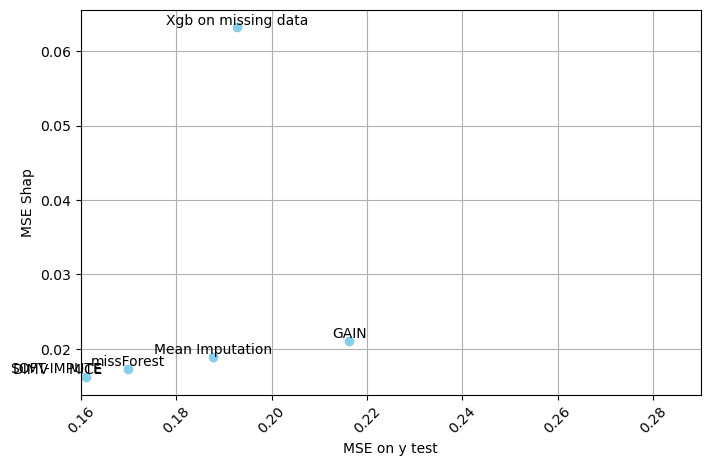

In [10]:
print('imputation MSE versus Shapley MSE')
plt.figure(figsize=(8, 5))
plt.scatter(dfplot['MSE on y test'],dfplot['MSE Shap'], color='skyblue')
for i, row in dfplot.iterrows():
    plt.text(row['MSE on y test'],row['MSE Shap'], row.name, ha='center', va='bottom')
plt.ylabel('MSE Shap')
plt.xlabel('MSE on y test')
plt.xlim(0.16, 0.29)
plt.xticks(rotation=45)
plt.grid(True)  # Adding grid for better visualization
plt.savefig('results/'+ ouput_name+'imputation_mse_vs_shap_mse'+'.png',bbox_inches='tight')
plt.show()

In [11]:
dfplot = pd.DataFrame({'MSE':np.hstack((0,mse_imputation_all)), 'MSE Shap': mse_shap_all}, index = dfplot.index)
dfplot

,MSE,MSE Shap
Xgb on missing data,0.000000,0.063177
Mean Imputation,0.217274,0.018949
MICE,0.113086,0.016180
DIMV,0.107304,0.016306
missForest,0.120589,0.017306
SOFT-IMPUTE,0.115489,0.016370
GAIN,0.251178,0.021111


imputation MSE versus Shapley MSE


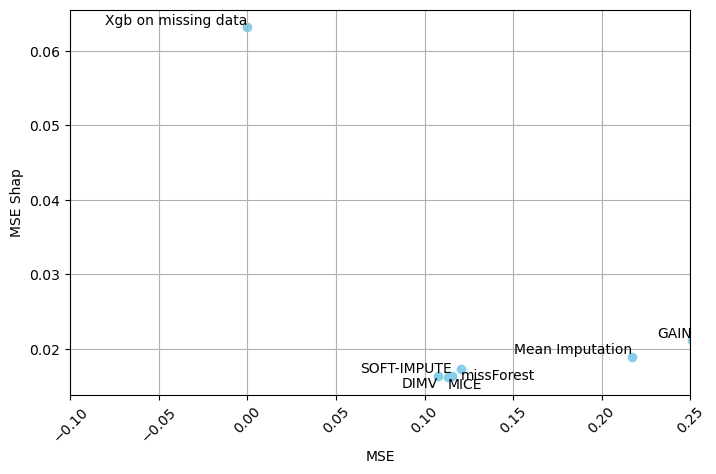

In [12]:
print('imputation MSE versus Shapley MSE')
plt.figure(figsize=(8, 5))
plt.scatter(dfplot['MSE'],dfplot['MSE Shap'], color='skyblue')
for i, row in dfplot.iterrows():
    if (row.name == 'missForest') or (row.name == 'MICE'):
        plt.text(row['MSE'],row['MSE Shap'], row.name, ha='left', va='top')
    else:
        if  (row.name == 'DIMV'):
            plt.text(row['MSE'],row['MSE Shap'], row.name, ha='right', va='top')
        else:
            plt.text(row['MSE'],row['MSE Shap'], row.name, ha='right', va='bottom')     
plt.ylabel('MSE Shap')
plt.xlabel('MSE')
plt.xlim(-0.1, 0.25)
plt.xticks(rotation=45)
plt.grid(True)  # Adding grid for better visualization
plt.savefig('results/'+ ouput_name+'imputation_mse_vs_shap_mse'+'.png',bbox_inches='tight')
plt.show()

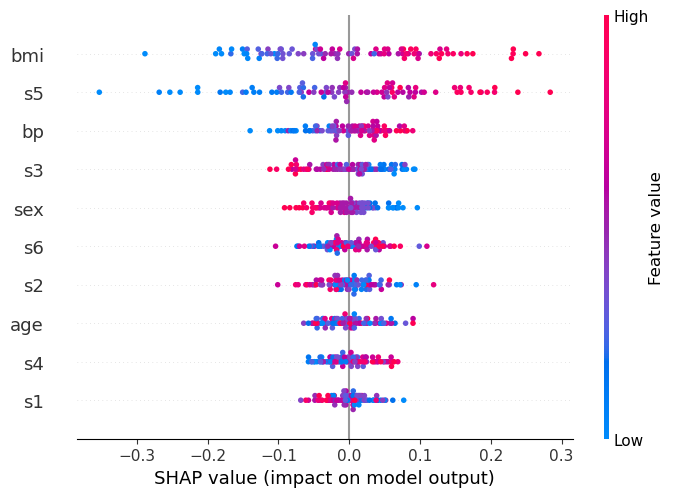

In [13]:
plt.figure()
shap.plots.beeswarm(shap_values_ori, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'ori'+'.png',bbox_inches='tight')
plt.show()

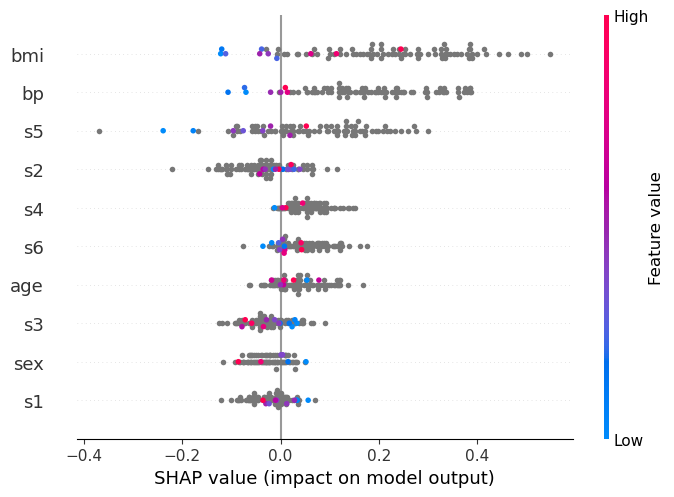

In [14]:
plt.figure()
shap.plots.beeswarm(shap_values_xm, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'xm'+'.png',bbox_inches='tight')
plt.show()

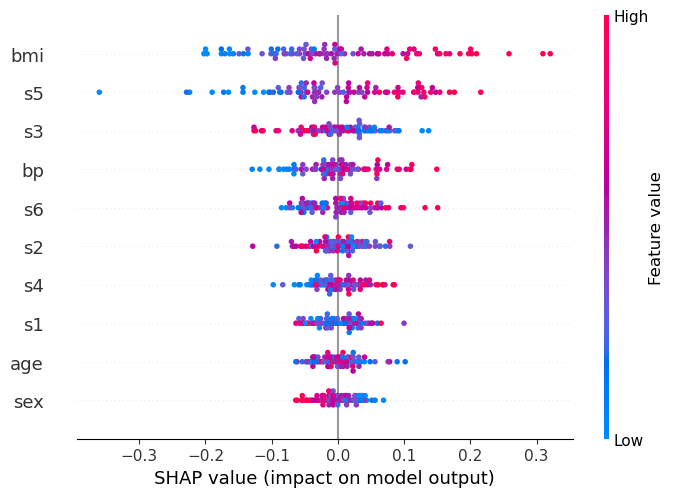

In [15]:
plt.figure()
shap.plots.beeswarm(shap_values_mi, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'mi'+'.png',bbox_inches='tight')
plt.show()

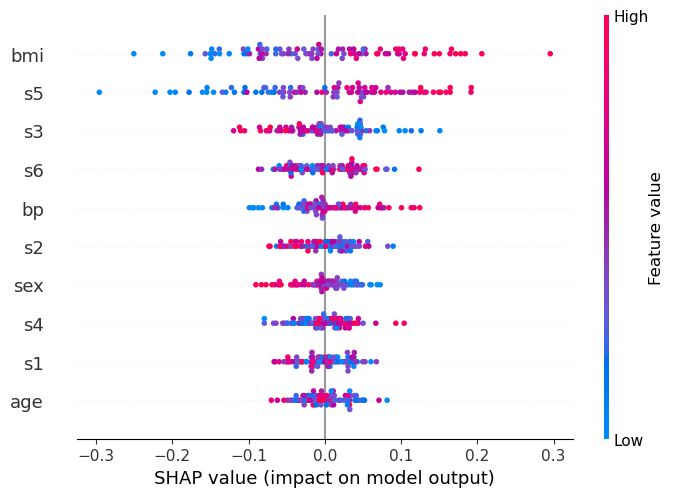

In [16]:
plt.figure()
shap.plots.beeswarm(shap_values_mice, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'mice'+'.png',bbox_inches='tight')
plt.show()

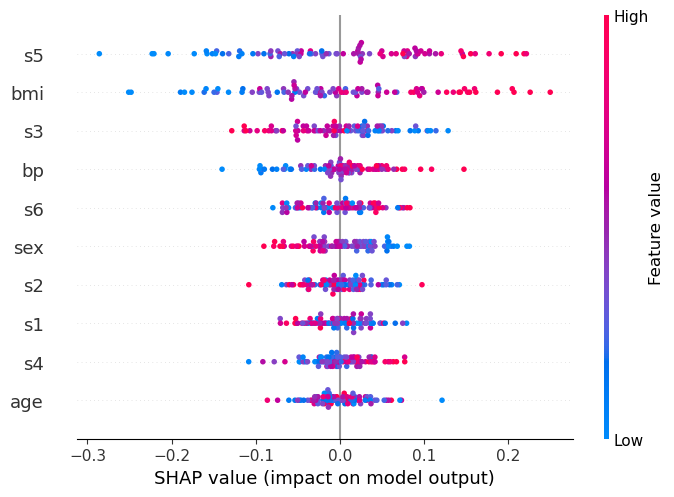

In [17]:
plt.figure()
shap.plots.beeswarm(shap_values_dimv, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'dimv'+'.png',bbox_inches='tight')
plt.show()

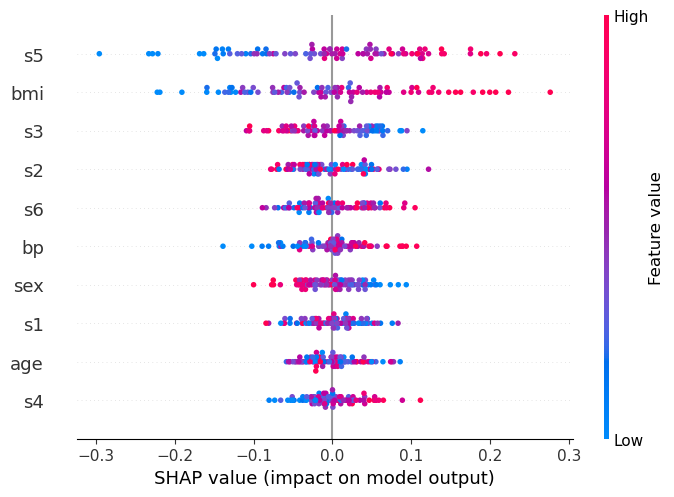

In [18]:
plt.figure()
shap.plots.beeswarm(shap_values_mf, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'mf'+'.png',bbox_inches='tight')
plt.show()

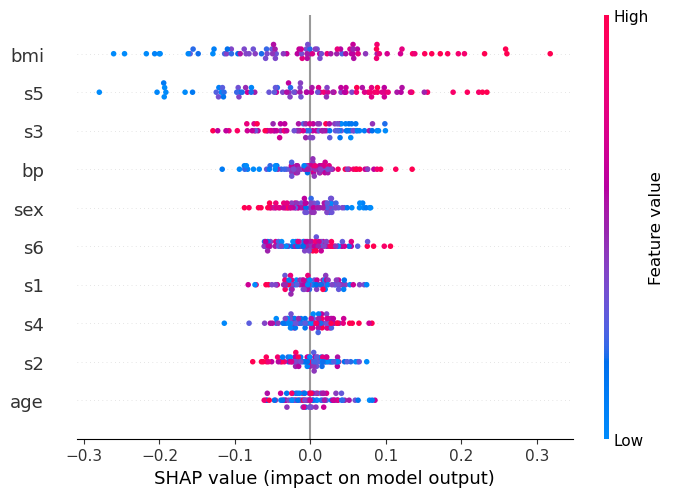

In [19]:
plt.figure()
shap.plots.beeswarm(shap_values_soft, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'soft'+'.png',bbox_inches='tight')
plt.show()

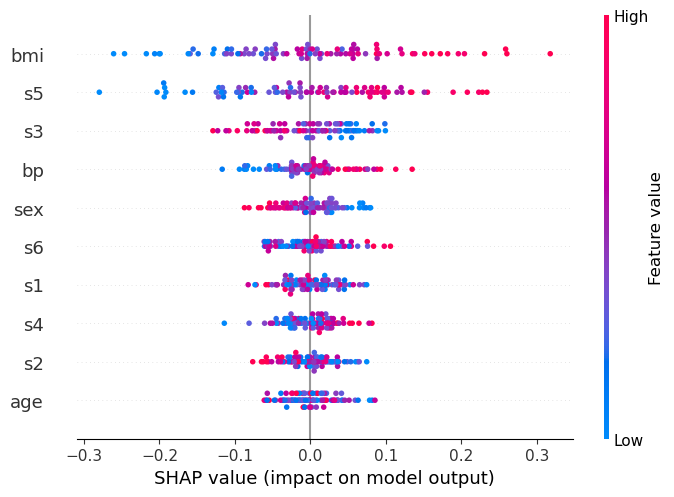

In [20]:
plt.figure()
shap.plots.beeswarm(shap_values_soft, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'gain'+'.png',bbox_inches='tight')
plt.show()

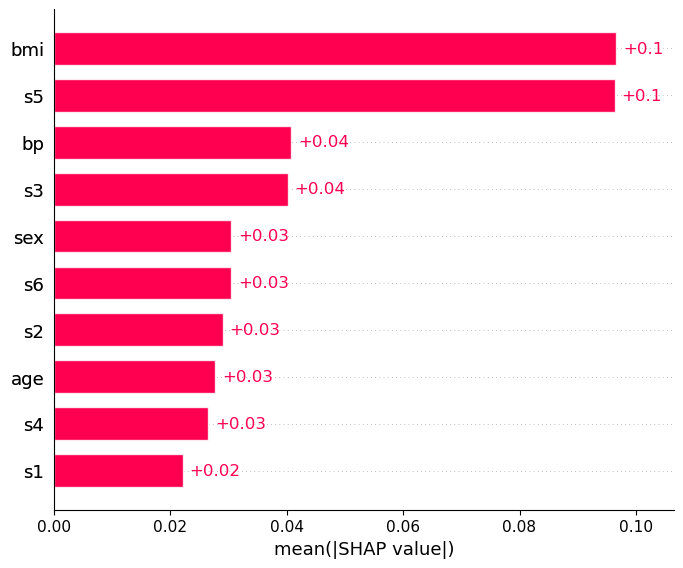

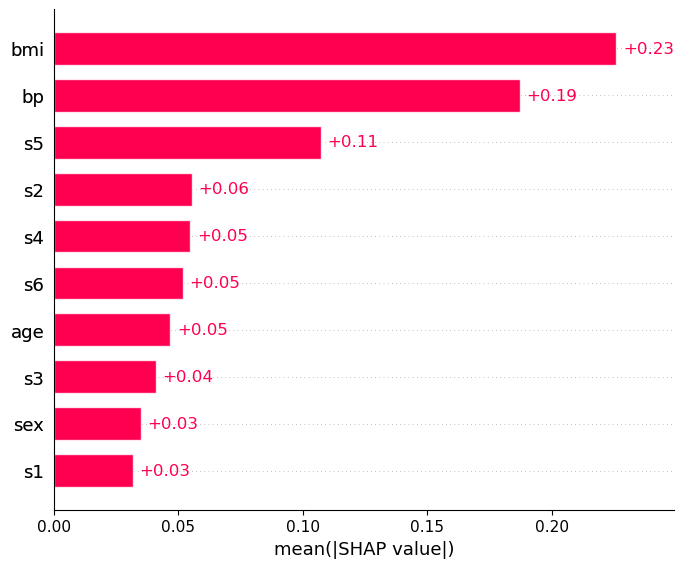

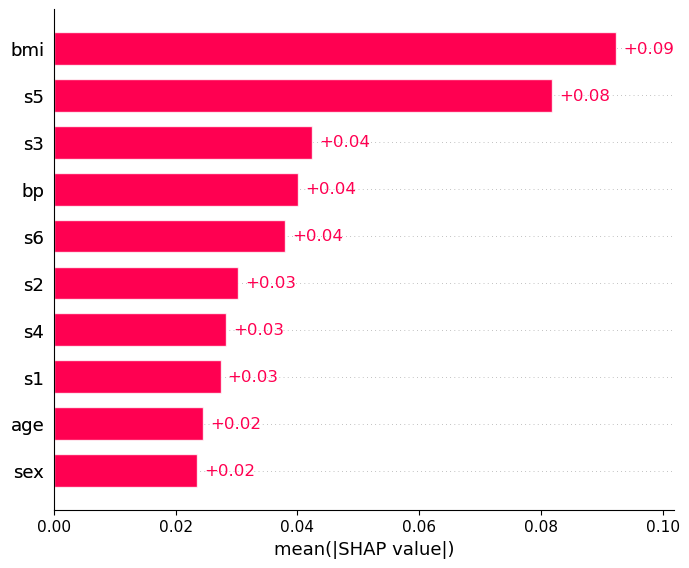

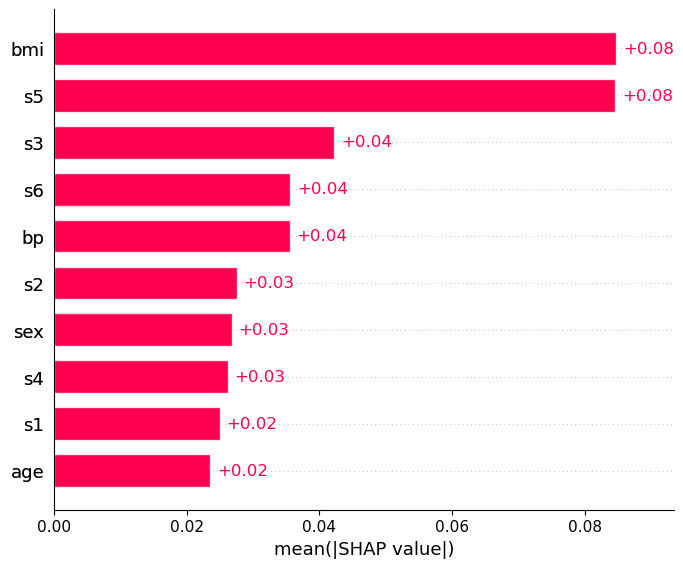

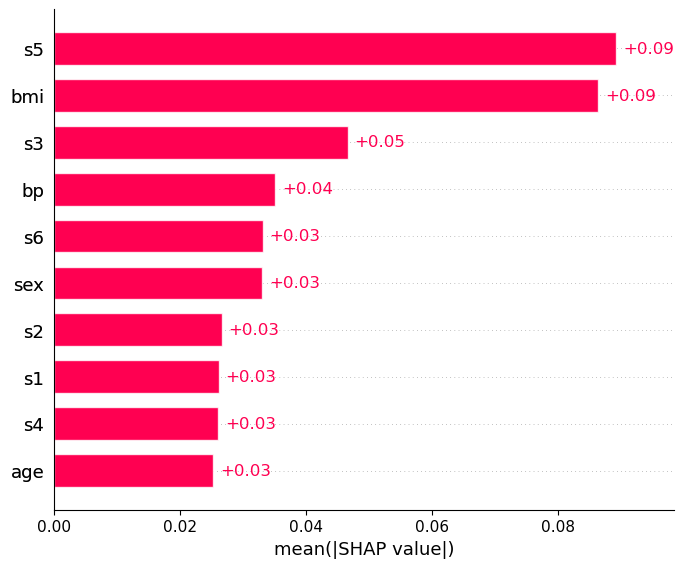

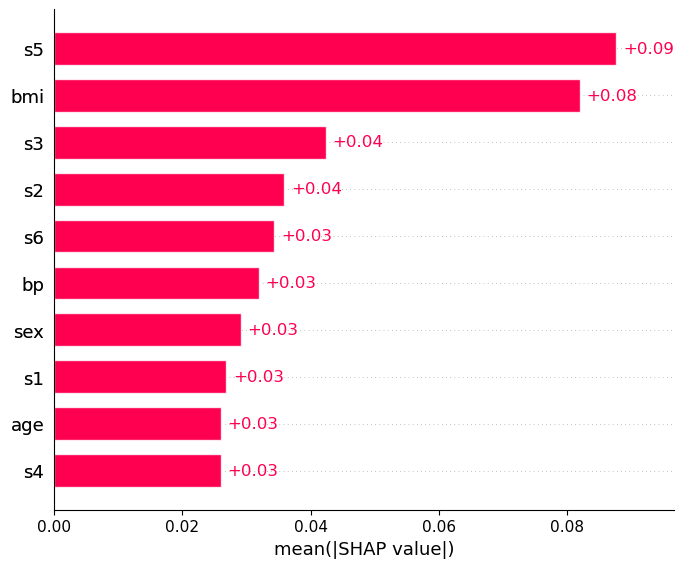

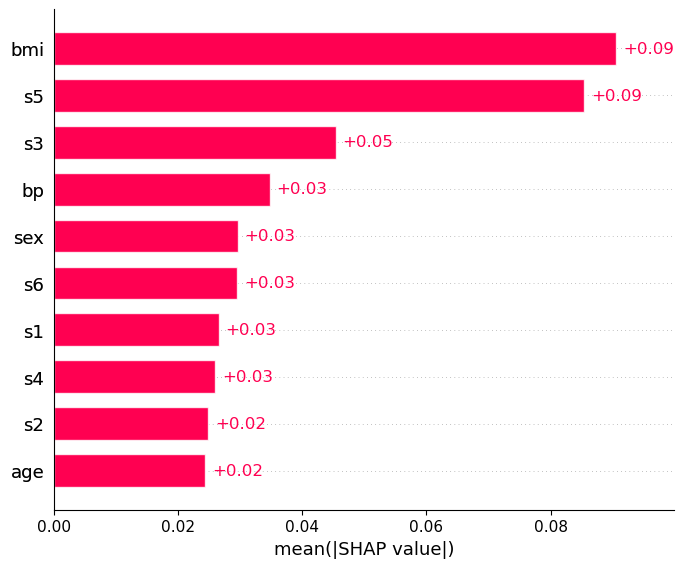

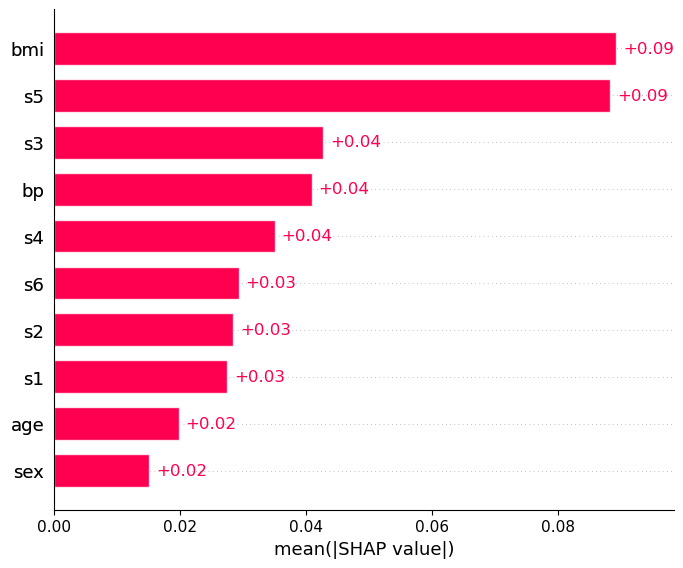

In [21]:
plt.figure()
shap.plots.bar(shap_values_ori, show=False)
plt.savefig('results/'+ouput_name+'bar_ori'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_xm, show=False)
plt.savefig('results/'+ouput_name+'bar_xm'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_mi, show=False)
plt.savefig('results/'+ouput_name+'bar_mi'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_mice, show=False)
plt.savefig('results/'+ouput_name+'bar_mice'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_dimv, show=False)
plt.savefig('results/'+ouput_name+'bar_dimv'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_mf, show=False)
plt.savefig('results/'+ouput_name+'bar_mf'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_soft, show=False)
plt.savefig('results/'+ouput_name+'bar_soft'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_gain, show=False)
plt.savefig('results/'+ouput_name+'bar_gain'+'.png',bbox_inches='tight')

<Figure size 6400x4800 with 0 Axes>

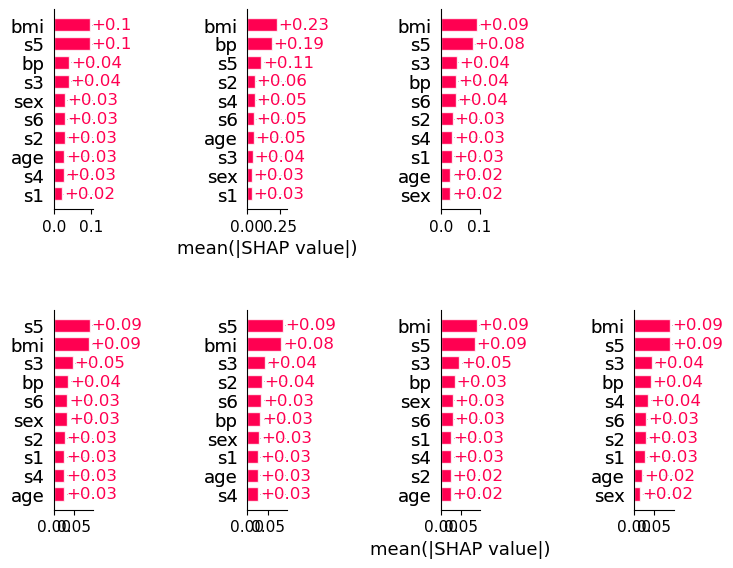

In [22]:
plt.figure(dpi=1000)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(200,100))
plt.sca(axes[0,0])
shap.plots.bar(shap_values_ori, show=False)
plt.sca(axes[0,1])
shap.plots.bar(shap_values_xm, show=False)
plt.sca(axes[0,2])
shap.plots.bar(shap_values_mi, show=False)
plt.sca(axes[0,3])
shap.plots.bar(shap_values_mice, show=False)
plt.sca(axes[1,0])
shap.plots.bar(shap_values_dimv, show=False)
plt.sca(axes[1,1])
shap.plots.bar(shap_values_mf, show=False)
plt.sca(axes[1,2])
shap.plots.bar(shap_values_soft, show=False)
plt.sca(axes[1,3])
shap.plots.bar(shap_values_gain, show=False)
axes[0,3].set_visible(False)
axes[0,0].set_xlabel('')
axes[0,1].set_xlim(0,0.3)
axes[1,1].set_xlabel('')
axes[0,2].set_xlabel('')
axes[1,0].set_xlabel('')
axes[1,3].set_xlabel('')
axes[0,1].set_ylabel('')
axes[0,2].set_ylabel('')
axes[1,1].set_ylabel('')
plt.subplots_adjust(wspace=3.9, hspace = .5) 
plt.savefig('results/'+ouput_name+'bar'+'.png',bbox_inches='tight')
plt.show()

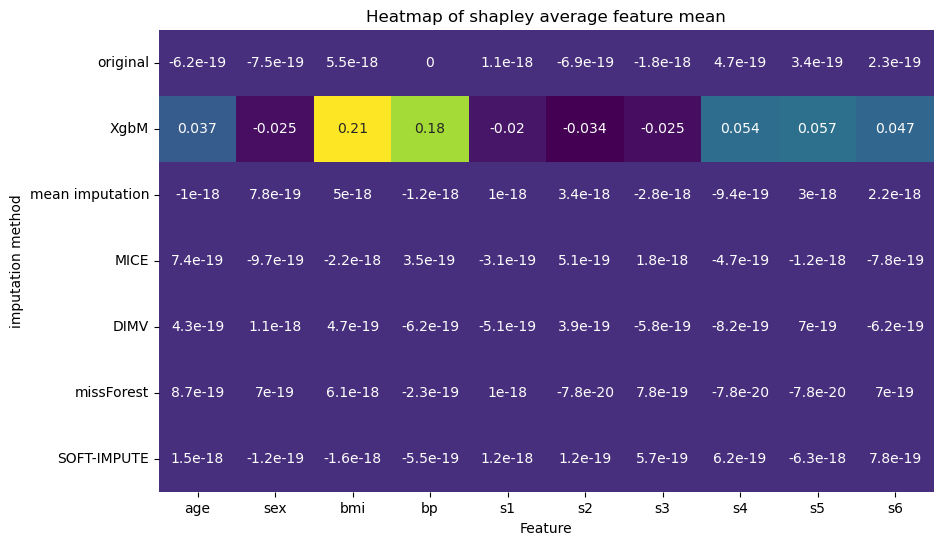

In [23]:
column_mean_ori = np.mean(shap_values_ori.values, axis=0)
column_mean_xm = np.mean(shap_values_xm.values, axis=0)
column_mean_mi = np.mean(shap_values_mi.values, axis=0)
column_mean_mice = np.mean(shap_values_mice.values, axis=0)
column_mean_dimv = np.mean(shap_values_dimv.values, axis=0)
column_mean_mf = np.mean(shap_values_mf.values, axis=0)
column_mean_soft = np.mean(shap_values_soft.values, axis=0)
heat_df = pd.DataFrame(np.vstack((column_mean_ori, column_mean_xm,column_mean_mi,column_mean_mice,
                                  column_mean_dimv,column_mean_mf,column_mean_soft)))
heat_df.columns = X_train.columns
heat_df.index = np.array(['original', 'XgbM', 'mean imputation', 'MICE','DIMV','missForest', 'SOFT-IMPUTE'])
plt.figure(figsize=(10, 6))
sns.heatmap(heat_df, cmap='viridis', annot=True, cbar=False)
plt.title('Heatmap of shapley average feature mean')
plt.xlabel('Feature')
plt.ylabel('imputation method')
plt.savefig('results/'+ouput_name+'heatmap'+'.png',bbox_inches='tight')
plt.show()